In [1]:
import numpy as np
import cv2 as cv
import glob

In [2]:
# termination criteria
criteria = (cv.TERM_CRITERIA_EPS + cv.TERM_CRITERIA_MAX_ITER, 30, 0.001)

In [3]:
# Define the chess board rows and columns
rows = 11
cols = 8

In [4]:
# prepare object points, like (0,0,0), (1,0,0), (2,0,0) ....,(6,5,0)
objp = np.zeros((rows*cols,3), np.float32)
objp[:,:2] = np.mgrid[0:rows,0:cols].T.reshape(-1,2)
 
# Arrays to store object points and image points from all the images.
objpoints = [] # 3d point in real world space
imgpoints = [] # 2d points in image plane.
 

In [5]:
images = glob.glob('*.bmp')

In [6]:
import cv2
for fname in images:
    img = cv.imread(fname)
    gray = cv.cvtColor(img, cv.COLOR_BGR2GRAY)
 
    # Find the chess board corners
    ret, corners = cv2.findChessboardCorners(gray, (rows, cols), None)
 
    # If found, add object points, image points (after refining them)
    if ret == True:
        objpoints.append(objp)
 
        corners2 = cv.cornerSubPix(gray,corners, (11,11), (-1,-1), criteria)
        imgpoints.append(corners2)
 
        # Draw and display the corners
        cv.drawChessboardCorners(img, (rows, cols), corners2, ret)
        cv.imshow('img', img)
        cv.waitKey(500)
 
cv.destroyAllWindows()


In [7]:
ret, mtx, dist, rvecs, tvecs = cv.calibrateCamera(objpoints, imgpoints, gray.shape[::-1], None, None)

In [8]:
mtx

array([[2.51871226e+03, 0.00000000e+00, 1.08045518e+03],
       [0.00000000e+00, 2.51898572e+03, 8.10445150e+02],
       [0.00000000e+00, 0.00000000e+00, 1.00000000e+00]])

In [9]:
ret

0.055280045711773224

In [10]:
rvecs

(array([[ 0.08408605],
        [-0.22289696],
        [ 0.34257825]]),
 array([[-0.13263158],
        [ 0.03787585],
        [ 0.08311908]]))

In [11]:
mtx

array([[2.51871226e+03, 0.00000000e+00, 1.08045518e+03],
       [0.00000000e+00, 2.51898572e+03, 8.10445150e+02],
       [0.00000000e+00, 0.00000000e+00, 1.00000000e+00]])

In [12]:
tvecs

(array([[-0.92128639],
        [-4.70643807],
        [32.50237739]]),
 array([[-1.45624132],
        [-3.14147107],
        [36.32171909]]))

In [13]:
corners

array([[[ 979.62915,  592.7919 ]],

       [[1048.5057 ,  597.94507]],

       [[1117.7013 ,  603.28406]],

       [[1187.0565 ,  608.66907]],

       [[1256.5367 ,  613.9695 ]],

       [[1326.0482 ,  619.4644 ]],

       [[1395.795  ,  624.9137 ]],

       [[1465.6465 ,  630.35016]],

       [[1535.518  ,  635.7168 ]],

       [[1605.4448 ,  641.28705]],

       [[1675.4097 ,  646.8596 ]],

       [[ 973.2992 ,  660.6599 ]],

       [[1042.3809 ,  665.9693 ]],

       [[1111.8807 ,  671.3873 ]],

       [[1181.4454 ,  676.98206]],

       [[1251.2025 ,  682.40027]],

       [[1321.0782 ,  687.7247 ]],

       [[1391.0511 ,  693.29877]],

       [[1461.0896 ,  698.9029 ]],

       [[1531.2657 ,  704.4069 ]],

       [[1601.4307 ,  709.93   ]],

       [[1671.622  ,  715.5236 ]],

       [[ 966.87286,  729.0249 ]],

       [[1036.3387 ,  734.5553 ]],

       [[1106.0409 ,  740.0329 ]],

       [[1175.9144 ,  745.59644]],

       [[1245.8661 ,  751.1587 ]],

       [[1315.9698 ,  756.66

In [14]:
retval, rvec, tvec  = cv2.solvePnP(objpoints, imgpoints, mtx,dist)

error: OpenCV(4.5.5) :-1: error: (-5:Bad argument) in function 'solvePnP'
> Overload resolution failed:
>  - objectPoints is not a numpy array, neither a scalar
>  - Expected Ptr<cv::UMat> for argument 'objectPoints'


In [15]:
objpoints

[array([[ 0.,  0.,  0.],
        [ 1.,  0.,  0.],
        [ 2.,  0.,  0.],
        [ 3.,  0.,  0.],
        [ 4.,  0.,  0.],
        [ 5.,  0.,  0.],
        [ 6.,  0.,  0.],
        [ 7.,  0.,  0.],
        [ 8.,  0.,  0.],
        [ 9.,  0.,  0.],
        [10.,  0.,  0.],
        [ 0.,  1.,  0.],
        [ 1.,  1.,  0.],
        [ 2.,  1.,  0.],
        [ 3.,  1.,  0.],
        [ 4.,  1.,  0.],
        [ 5.,  1.,  0.],
        [ 6.,  1.,  0.],
        [ 7.,  1.,  0.],
        [ 8.,  1.,  0.],
        [ 9.,  1.,  0.],
        [10.,  1.,  0.],
        [ 0.,  2.,  0.],
        [ 1.,  2.,  0.],
        [ 2.,  2.,  0.],
        [ 3.,  2.,  0.],
        [ 4.,  2.,  0.],
        [ 5.,  2.,  0.],
        [ 6.,  2.,  0.],
        [ 7.,  2.,  0.],
        [ 8.,  2.,  0.],
        [ 9.,  2.,  0.],
        [10.,  2.,  0.],
        [ 0.,  3.,  0.],
        [ 1.,  3.,  0.],
        [ 2.,  3.,  0.],
        [ 3.,  3.,  0.],
        [ 4.,  3.,  0.],
        [ 5.,  3.,  0.],
        [ 6.,  3.,  0.],


In [16]:
imgpoints

[array([[[1009.3044 ,  446.37698]],
 
        [[1080.2369 ,  473.57663]],
 
        [[1150.2701 ,  500.5773 ]],
 
        [[1219.3706 ,  527.2389 ]],
 
        [[1287.5402 ,  553.59015]],
 
        [[1354.643  ,  579.5538 ]],
 
        [[1420.8647 ,  605.211  ]],
 
        [[1486.1284 ,  630.48694]],
 
        [[1550.4523 ,  655.4471 ]],
 
        [[1613.7998 ,  680.0644 ]],
 
        [[1676.1753 ,  704.3123 ]],
 
        [[ 982.8579 ,  519.1841 ]],
 
        [[1053.8578 ,  545.9412 ]],
 
        [[1124.1338 ,  572.436  ]],
 
        [[1193.2844 ,  598.564  ]],
 
        [[1261.5508 ,  624.4598 ]],
 
        [[1328.8777 ,  649.7991 ]],
 
        [[1395.1912 ,  674.9573 ]],
 
        [[1460.5359 ,  699.7246 ]],
 
        [[1524.9382 ,  724.1674 ]],
 
        [[1588.4379 ,  748.26807]],
 
        [[1650.875  ,  771.9932 ]],
 
        [[ 956.5615 ,  591.9537 ]],
 
        [[1027.7312 ,  618.244  ]],
 
        [[1098.0454 ,  644.20465]],
 
        [[1167.3763 ,  669.7949 ]],
 
        [[12

In [17]:
cv2.calibrateCamera(objpoints, imgpoints, gray.shape[::-1], None, None)

(0.055280045711773224,
 array([[2.51871226e+03, 0.00000000e+00, 1.08045518e+03],
        [0.00000000e+00, 2.51898572e+03, 8.10445150e+02],
        [0.00000000e+00, 0.00000000e+00, 1.00000000e+00]]),
 array([[-7.73529233e-02,  1.60282894e-01,  7.23371903e-05,
          1.75367878e-03, -4.47502729e-01]]),
 (array([[ 0.08408605],
         [-0.22289696],
         [ 0.34257825]]),
  array([[-0.13263158],
         [ 0.03787585],
         [ 0.08311908]])),
 (array([[-0.92128639],
         [-4.70643807],
         [32.50237739]]),
  array([[-1.45624132],
         [-3.14147107],
         [36.32171909]])))

In [18]:
retval, rvec, tvec  = cv2.solvePnP(objpoints, imgpoints, mtx, dist)

error: OpenCV(4.5.5) :-1: error: (-5:Bad argument) in function 'solvePnP'
> Overload resolution failed:
>  - objectPoints is not a numpy array, neither a scalar
>  - Expected Ptr<cv::UMat> for argument 'objectPoints'


In [19]:
R = cv.Rodrigues(rvecs[0])[0]
tvec = tvecs[0].squeeze()
H = np.dot(mtx, np.concatenate((R[:,:2], tvec[:,None]), axis = 1) )/tvec[-1] 
plt.imshow(cv.warpPerspective(dst, np.linalg.inv(H), (dst.shape[1], dst.shape[0])))

NameError: name 'plt' is not defined

In [20]:
import matplotlib.pyplot as plt

In [21]:
R = cv.Rodrigues(rvecs[0])[0]
tvec = tvecs[0].squeeze()
H = np.dot(mtx, np.concatenate((R[:,:2], tvec[:,None]), axis = 1) )/tvec[-1] 
plt.imshow(cv.warpPerspective(dst, np.linalg.inv(H), (dst.shape[1], dst.shape[0])))

NameError: name 'dst' is not defined

In [22]:
R = cv.Rodrigues(rvecs[0])[0]

In [23]:
tvec = tvecs[0].squeeze()

In [24]:
R

array([[ 0.91768338, -0.34195928, -0.20228956],
       [ 0.32348712,  0.93868232, -0.11929619],
       [ 0.23068007,  0.04403806,  0.97203259]])

In [25]:
H = np.dot(mtx, np.concatenate((R[:,:2], tvec[:,None]), axis = 1) )/tvec[-1] 

In [26]:
H

array([[ 7.87825404e+01, -2.50355801e+01,  1.00906178e+03],
       [ 3.08227602e+01,  7.38474534e+01,  4.45688747e+02],
       [ 7.09732922e-03,  1.35491809e-03,  1.00000000e+00]])

In [27]:
corners2

array([[[ 979.62915,  592.7919 ]],

       [[1048.5057 ,  597.94507]],

       [[1117.7013 ,  603.28406]],

       [[1187.0565 ,  608.66907]],

       [[1256.5367 ,  613.9695 ]],

       [[1326.0482 ,  619.4644 ]],

       [[1395.795  ,  624.9137 ]],

       [[1465.6465 ,  630.35016]],

       [[1535.518  ,  635.7168 ]],

       [[1605.4448 ,  641.28705]],

       [[1675.4097 ,  646.8596 ]],

       [[ 973.2992 ,  660.6599 ]],

       [[1042.3809 ,  665.9693 ]],

       [[1111.8807 ,  671.3873 ]],

       [[1181.4454 ,  676.98206]],

       [[1251.2025 ,  682.40027]],

       [[1321.0782 ,  687.7247 ]],

       [[1391.0511 ,  693.29877]],

       [[1461.0896 ,  698.9029 ]],

       [[1531.2657 ,  704.4069 ]],

       [[1601.4307 ,  709.93   ]],

       [[1671.622  ,  715.5236 ]],

       [[ 966.87286,  729.0249 ]],

       [[1036.3387 ,  734.5553 ]],

       [[1106.0409 ,  740.0329 ]],

       [[1175.9144 ,  745.59644]],

       [[1245.8661 ,  751.1587 ]],

       [[1315.9698 ,  756.66

In [28]:
ret

0.055280045711773224

In [29]:
imgpoints

[array([[[1009.3044 ,  446.37698]],
 
        [[1080.2369 ,  473.57663]],
 
        [[1150.2701 ,  500.5773 ]],
 
        [[1219.3706 ,  527.2389 ]],
 
        [[1287.5402 ,  553.59015]],
 
        [[1354.643  ,  579.5538 ]],
 
        [[1420.8647 ,  605.211  ]],
 
        [[1486.1284 ,  630.48694]],
 
        [[1550.4523 ,  655.4471 ]],
 
        [[1613.7998 ,  680.0644 ]],
 
        [[1676.1753 ,  704.3123 ]],
 
        [[ 982.8579 ,  519.1841 ]],
 
        [[1053.8578 ,  545.9412 ]],
 
        [[1124.1338 ,  572.436  ]],
 
        [[1193.2844 ,  598.564  ]],
 
        [[1261.5508 ,  624.4598 ]],
 
        [[1328.8777 ,  649.7991 ]],
 
        [[1395.1912 ,  674.9573 ]],
 
        [[1460.5359 ,  699.7246 ]],
 
        [[1524.9382 ,  724.1674 ]],
 
        [[1588.4379 ,  748.26807]],
 
        [[1650.875  ,  771.9932 ]],
 
        [[ 956.5615 ,  591.9537 ]],
 
        [[1027.7312 ,  618.244  ]],
 
        [[1098.0454 ,  644.20465]],
 
        [[1167.3763 ,  669.7949 ]],
 
        [[12

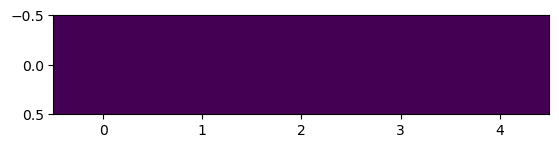

In [30]:
plt.imshow(cv.warpPerspective(dist, np.linalg.inv(H), (dist.shape[1], dist.shape[0])))

In [1]:
corners

NameError: name 'corners' is not defined